## Problem Statement:  
#### In this tutorial, I have worked with the Bank Marketing dataset which is downloaded to predict whether or not a customer will subscribe to a term deposit. I have used decision trees, random forests, and XGBoost to build classification models and evaluate their performance.

## Tasks:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score, precision_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from mlxtend.plotting import plot_learning_curves
from xgboost import XGBClassifier  
from prettytable import PrettyTable

In [1]:
import scikitplot as skplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
accuracyScoreList = []
precisionScoreList = []
recallScoreList = []
f1ScoreList = []
modelNameInfo = []

##### ● Use bank.csv dataset

##### ● Load the dataset into a Jupyter notebook or another Python environment of your choice.

In [2]:
BankDataFrame = pd.read_csv("data/Bank.csv") # Read csv file

In [3]:
BankDataFrame.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [11]:
BankDataFrame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [12]:
BankDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
BankDataFrame.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### ● Preprocess the dataset by encoding categorical features and handling missing values, if any. Use the following steps:

##### ● a. Convert the categorical features to numerical using one-hot encoding or label encoding, depending on the nature of the feature.

In [14]:
# Perform label encoding on categorical columns as a part of data preprocessing
# so that data converted into numberical form, and understandable for ML algorithms...

In [15]:
object_bank_columns_data = BankDataFrame.select_dtypes(include = object)
object_bank_columns_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [16]:
object_bank_columns_array = object_bank_columns_data.values
object_bank_columns_array

array([['unemployed', 'married', 'primary', ..., 'oct', 'unknown', 'no'],
       ['services', 'married', 'secondary', ..., 'may', 'failure', 'no'],
       ['management', 'single', 'tertiary', ..., 'apr', 'failure', 'no'],
       ...,
       ['technician', 'married', 'secondary', ..., 'aug', 'unknown',
        'no'],
       ['blue-collar', 'married', 'secondary', ..., 'feb', 'other', 'no'],
       ['entrepreneur', 'single', 'tertiary', ..., 'apr', 'other', 'no']],
      dtype=object)

In [17]:
for i in range(object_bank_columns_array.shape[1]): 
    le = LabelEncoder()
    Unique_labels = set(object_bank_columns_array[:,i])
    Unique_labels = list(Unique_labels)
    Unique_labels = np.array(Unique_labels)
    le.fit(Unique_labels)
    object_bank_columns_array[:,i] = le.transform(object_bank_columns_array[:,i])

In [18]:
object_bank_columns_array

array([[10, 1, 0, ..., 10, 3, 0],
       [7, 1, 1, ..., 8, 0, 0],
       [4, 2, 2, ..., 0, 0, 0],
       ...,
       [9, 1, 1, ..., 1, 3, 0],
       [1, 1, 1, ..., 3, 1, 0],
       [2, 2, 2, ..., 0, 1, 0]], dtype=object)

In [19]:
object_bank_columns_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,1,0,0,5,3,0
4517,6,1,2,1,1,1,2,8,3,0
4518,9,1,1,0,0,0,0,1,3,0
4519,1,1,1,0,0,0,0,3,1,0


In [20]:
# fetch only int and float columns 
int_float_bank_column_data = BankDataFrame.select_dtypes(include = [int, float])
int_float_bank_column_data

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [21]:
# concatinate 2 different dataframes of bank data into 1... after preforming necessary 
# data preprocessing steps., to form final dataset...
FinalBankDataFrame = pd.concat([int_float_bank_column_data, 
                                   object_bank_columns_data], axis =1)
FinalBankDataFrame

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,7,1,1,0,1,0,0,5,3,0
4517,57,-3313,9,153,1,-1,0,6,1,2,1,1,1,2,8,3,0
4518,57,295,19,151,11,-1,0,9,1,1,0,0,0,0,1,3,0
4519,28,1137,6,129,4,211,3,1,1,1,0,0,0,0,3,1,0


In [22]:
for column in FinalBankDataFrame.columns:
    FinalBankDataFrame[column] =FinalBankDataFrame[column].astype('int')

In [23]:
FinalBankDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   balance    4521 non-null   int64
 2   day        4521 non-null   int64
 3   duration   4521 non-null   int64
 4   campaign   4521 non-null   int64
 5   pdays      4521 non-null   int64
 6   previous   4521 non-null   int64
 7   job        4521 non-null   int64
 8   marital    4521 non-null   int64
 9   education  4521 non-null   int64
 10  default    4521 non-null   int64
 11  housing    4521 non-null   int64
 12  loan       4521 non-null   int64
 13  contact    4521 non-null   int64
 14  month      4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


##### ● b. Handle missing values in the dataset. You can either drop the rows with missing values or impute them using techniques like mean or median imputation.

In [24]:
# this dataset does not contains any null value,, 
# so it is not necessary to implement any null values handling method....

##### ● Split the dataset into training and testing sets using a 70/30 split.

In [25]:
FinalBankDataFrame.head(5)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0


In [26]:
FinalBankDataFrame.columns 

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [27]:
X_model = FinalBankDataFrame[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]

In [28]:
Y_model = FinalBankDataFrame['y']


In [29]:
x_train_model, x_test_model, y_train_model, y_test_model = train_test_split(X_model,Y_model,test_size=0.3)

In [30]:
x_train_model.shape

(3164, 16)

In [31]:
x_test_model.shape

(1357, 16)

##### ● Build a decision tree classifier using scikit-learn's DecisionTreeClassifier and train it on the training set.

In [32]:
decisionTreeObj  =  DecisionTreeClassifier(criterion="entropy")

In [33]:
decisionTreeObj.fit(x_train_model,y_train_model)

DecisionTreeClassifier(criterion='entropy')

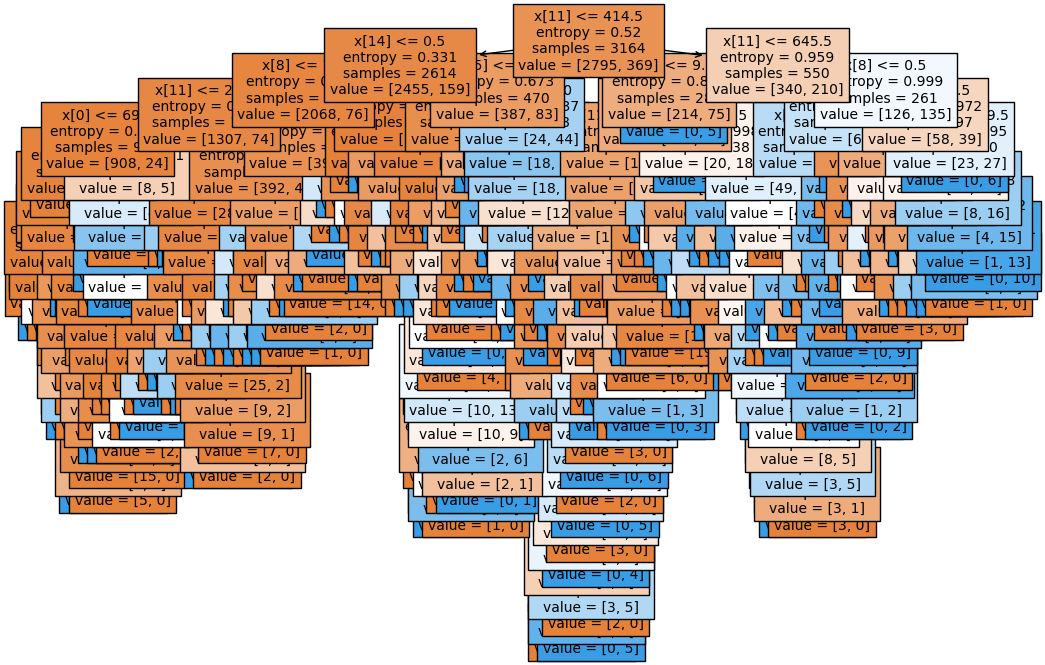

In [34]:
plt.figure(figsize=(12,8))
tree.plot_tree(decisionTreeObj, filled=True, fontsize=10)
plt.show()

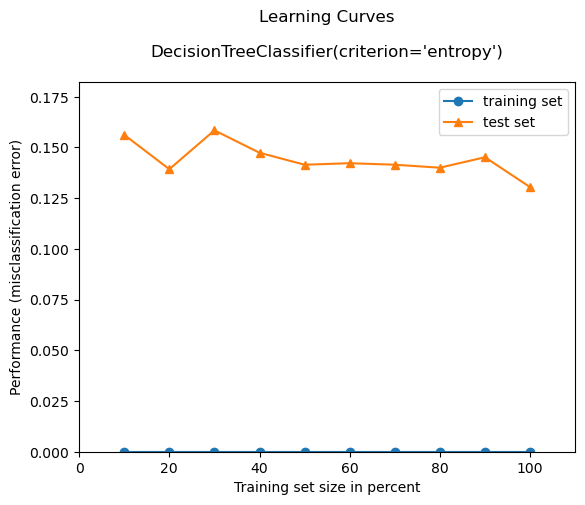

In [35]:
plot_learning_curves(x_train_model, y_train_model, x_test_model, y_test_model, decisionTreeObj)
plt.show()

##### ● Evaluate the performance of the decision tree classifier on the testing set using accuracy, precision, recall, and F1-score.

In [36]:
y_pred_decision_tree = decisionTreeObj.predict(x_test_model)
modelNameInfo.append("Decision Tree")

In [37]:
accuracy_dec_tree_model =  accuracy_score(y_pred_decision_tree, y_test_model)
print("Accuracy :", accuracy_dec_tree_model)
accuracyScoreList.append(round((accuracy_dec_tree_model * 100.0),2))
 

Accuracy : 0.8695652173913043


In [38]:
f1_score_dec_tree_model =  f1_score(y_pred_decision_tree, y_test_model)
print("F1 Score :", f1_score_dec_tree_model)
f1ScoreList.append(f1_score_dec_tree_model)

F1 Score : 0.42718446601941745


In [39]:
precision_dec_tree_model = precision_score(y_pred_decision_tree,y_test_model)
print("Precision :", accuracy_dec_tree_model)
precisionScoreList.append(precision_dec_tree_model)

Precision : 0.8695652173913043


In [40]:
recall_dec_tree_model = recall_score(y_pred_decision_tree,y_test_model)
print("Recall :", recall_dec_tree_model)
recallScoreList.append(recall_dec_tree_model)

Recall : 0.42038216560509556


In [41]:
decisionTreeObj.predict([[35, 14, 1, 3,0,7689,1,1,0,29,5,654,2,85,5,3]])

array([0])

##### ● Build a random forest classifier using scikit-learn's RandomForestClassifier and train it on the training set.

In [42]:
#Fitting Decision Tree classifier to the training set  

randomForestObject= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
randomForestObject.fit(x_train_model, y_train_model)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

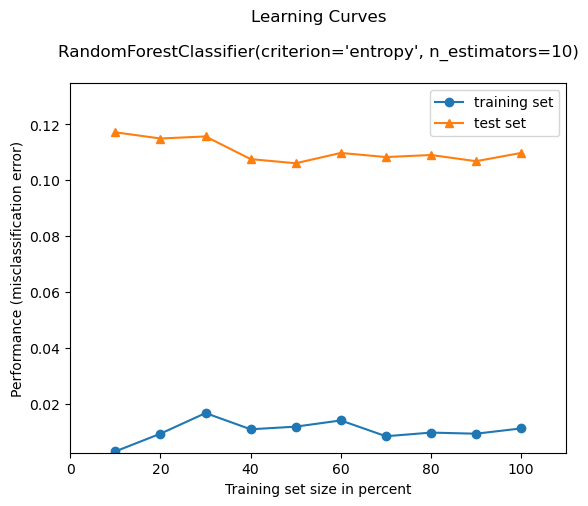

In [43]:
plot_learning_curves(x_train_model, y_train_model, x_test_model, y_test_model, randomForestObject)
plt.show()

##### ● Evaluate the performance of the tuned random forest classifier on the testing set using accuracy, precision, recall, and F1-score.

In [44]:
#Predicting the test set result  
y_pred_random_forest = randomForestObject.predict(x_test_model)  
modelNameInfo.append("Random Forest")

In [45]:
accuracy_score_random_forest = accuracy_score(y_pred_random_forest,y_test_model)
print("accuracy :", accuracy_score_random_forest)
accuracyScoreList.append(round((accuracy_score_random_forest * 100.0),2))


accuracy : 0.8901989683124539


In [46]:
f1_score_random_forest =  f1_score(y_pred_random_forest, y_test_model)
print("F1 Score :", f1_score_random_forest)
f1ScoreList.append(f1_score_random_forest)

F1 Score : 0.31336405529953915


In [47]:
precision_score_random_forest =  precision_score(y_pred_random_forest, y_test_model)
print("Precision Score :", precision_score_random_forest)
precisionScoreList.append(precision_score_random_forest)

Precision Score : 0.2236842105263158


In [48]:
recall_score_random_forest =  recall_score(y_pred_random_forest, y_test_model)
print("Recall Score :", recall_score_random_forest)
recallScoreList.append(recall_score_random_forest)

Recall Score : 0.5230769230769231


In [49]:
randomForestObject.predict([[35, 14, 1, 3,0,7689,1,1,0,29,5,654,2,85,5,3]])

array([0])

##### ● Build an XGBoost classifier using the xgboost library and train it on the training set.

In [50]:
xgbClassifierModel = XGBClassifier()  
xgbClassifierModel.fit(x_train_model, y_train_model) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

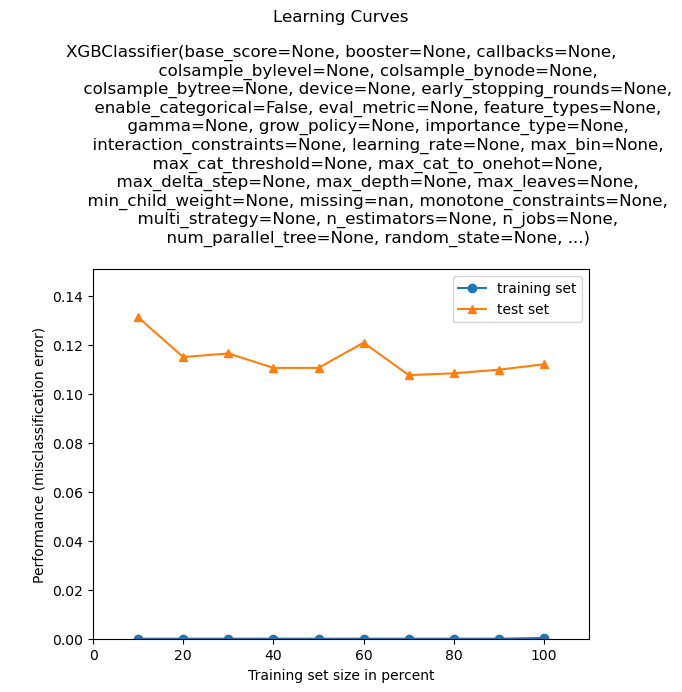

In [51]:
plot_learning_curves(x_train_model, y_train_model, x_test_model, y_test_model, xgbClassifierModel)
plt.show()

##### ● Evaluate the performance of the tuned XGBoost classifier on the testing set using accuracy, precision, recall, and F1-score

In [52]:
# make predictions for test data  
y_pred_XGBClassifier = xgbClassifierModel.predict(x_test_model)  
modelNameInfo.append("XGB Classifier")

In [53]:
# evaluating predictions  
accuracy_xgbClassifier = accuracy_score(y_test_model,y_pred_XGBClassifier)  
print("Accuracy: ",(accuracy_xgbClassifier)) 
accuracyScoreList.append(round((accuracy_xgbClassifier * 100.0),2))

Accuracy:  0.887988209285188


In [54]:
recall_xgbClassifier = recall_score(y_test_model,y_pred_XGBClassifier)  
print("Recall: ",recall_xgbClassifier ) 
recallScoreList.append(recall_xgbClassifier)

Recall:  0.3618421052631579


In [55]:
precision_xgbClassifier = precision_score(y_test_model,y_pred_XGBClassifier)  
print("Precision: ",precision_xgbClassifier ) 
precisionScoreList.append(precision_xgbClassifier)

Precision:  0.5


In [56]:
f1_score_xgbClassifier = f1_score(y_test_model,y_pred_XGBClassifier)  
print("F1 Score: ",f1_score_xgbClassifier ) 
f1ScoreList.append(f1_score_xgbClassifier)

F1 Score:  0.4198473282442748


##### ● Create a visualization of all the three algorithms accuracy with respect to there accuracy

In [57]:
modelPerformanceTable = PrettyTable(["Model", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score"])
for i in range(0,3):
    modelPerformanceTable.add_row([modelNameInfo[i],accuracyScoreList[i], precisionScoreList[i],  recallScoreList[i], f1ScoreList[i]])
    
# Printing the tabulated list
print(modelPerformanceTable)

+----------------+----------------+--------------------+---------------------+---------------------+
|     Model      | Accuracy Score |  Precision Score   |     Recall Score    |       F1 Score      |
+----------------+----------------+--------------------+---------------------+---------------------+
| Decision Tree  |     86.96      | 0.4342105263157895 | 0.42038216560509556 | 0.42718446601941745 |
| Random Forest  |     89.02      | 0.2236842105263158 |  0.5230769230769231 | 0.31336405529953915 |
| XGB Classifier |      88.8      |        0.5         |  0.3618421052631579 |  0.4198473282442748 |
+----------------+----------------+--------------------+---------------------+---------------------+


In [58]:
#plt.bar(modelNameInfo,accuracyScoreList)

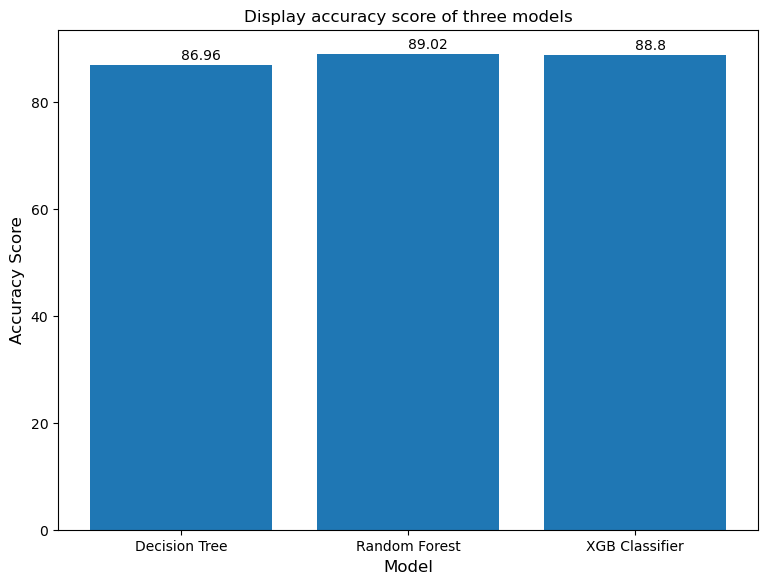

In [59]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(modelNameInfo,accuracyScoreList)
ax.set_ylabel('Accuracy Score',fontsize= 12)
ax.set_xlabel('Model',fontsize= 12)
ax.set_title('Display accuracy score of three models')
for i, v in enumerate(accuracyScoreList):
    ax.text( i ,v + 1, str(v), color='black')
plt.show()

In [60]:
lr_probas = DecisionTreeClassifier().fit(x_train_model, y_train_model).predict_proba(x_test_model)
rf_probas = RandomForestClassifier().fit(x_train_model, y_train_model).predict_proba(x_test_model)
gb_probas = XGBClassifier().fit(x_train_model, y_train_model).predict_proba(x_test_model)

probas_list = [lr_probas, rf_probas, gb_probas]
clf_names = ['Decision Tree ', 'Random Forest', 'XGB Classifier']

The calibration curve is suitable for comparing the performance of various models as well as understanding which threshold value for deciding class label is leading to model overfit or underfit. The points in various model lines which are above way above-dashed line have overfitted and one below the dashed line has under fitted. We need a model where points are mostly near the dashed linem


#### Thus according to the calibration curve, random forest and Xgb classifier are most suitable models for deciding class label as its curve is near to the perfect curve, however their accuracy value gets  interchange after every run....

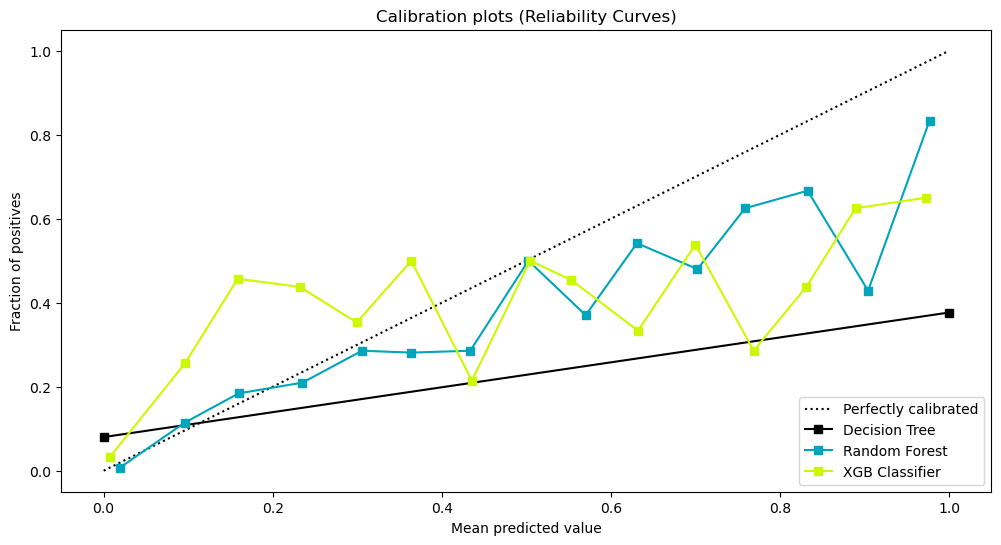

In [61]:
skplt.metrics.plot_calibration_curve(y_test_model,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );

#####  bar chart plot depicting the importance of features for various ML models.

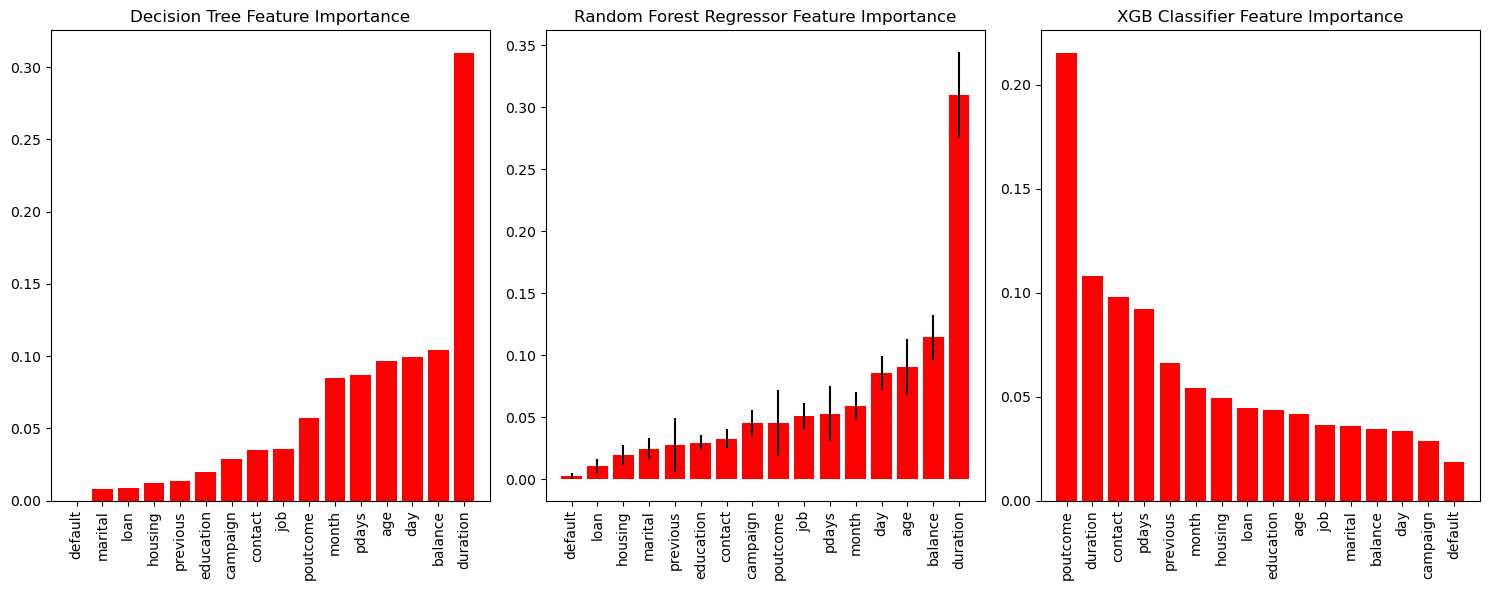

In [62]:

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
skplt.estimators.plot_feature_importances(decisionTreeObj, feature_names=BankDataFrame.columns,
                                         title="Decision Tree Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

ax2 = fig.add_subplot(132)
skplt.estimators.plot_feature_importances(randomForestObject, feature_names=BankDataFrame.columns,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax2);


ax3 = fig.add_subplot(133)
skplt.estimators.plot_feature_importances(xgbClassifierModel, feature_names=BankDataFrame.columns,
                                         title="XGB Classifier Feature Importance",
                                         x_tick_rotation=90,
                                         ax=ax3);

plt.tight_layout()

#### The accuracy score will help us to find the performance of different models...
#### The model with higher accuracy score will perform much better than others... 
#### I have display the accuracy score for different models.. to compare them

In [63]:
print("\nAccuracy of Decision Tree, Random Forest, and XGB Classifier\n")
print("* Accuracy Decision Tree:: %.2f%%" % (accuracy_dec_tree_model * 100.0))
print("* Accuracy Random Forest: %.2f%%" % (accuracy_score_random_forest * 100.0))
print("* Accuracy XGB Classifier: %.2f%%" % (accuracy_xgbClassifier * 100.0))



Accuracy of Decision Tree, Random Forest, and XGB Classifier

* Accuracy Decision Tree:: 86.96%
* Accuracy Random Forest: 89.02%
* Accuracy XGB Classifier: 88.80%


### Conclusion 

#### Comparing these three models, i have concluded that the Random forest classifier with accuracy score of 90% is the best model to be able to predict whether or not a customer will subscribe to a term deposit  from Bank Marketing dataset. 